# finding column/index keys of results dataframe

#results = pd.json_normalize(newsArticleSport['results']).columns

#Index(['slug_name', 'section', 'subsection', 'title', 'abstract', 'uri', 'url',
       #'byline', 'item_type', 'source', 'updated_date', 'created_date',
       #'published_date', 'first_published_date', 'material_type_facet',
      # 'kicker', 'subheadline', 'des_facet', 'org_facet', 'per_facet',
       #'geo_facet', 'related_urls', 'multimedia'],
     # dtype='object')


In [5]:
"""Simple News Analyzer Using New York Times API"""

import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from keys import API_KEY


#storing api url as a variable to use in request call
api_url= 'https://api.nytimes.com/svc/news/v3/content/nyt/sports.json?'    

# defining start date and end date as timestamps to use in request call to filter specific articles
start_date = pd.Timestamp(2024, 1, 1).strftime('%Y-%m-%d')
end_date = pd.Timestamp.now().date()

# var 'params' that defines the parameters for use in the api call 
params = {'api-key': API_KEY,
        'start_date': start_date,
        'end_date': end_date
         }


#api call stored in variable newsArticles

newsArticles = r.get(api_url, params = params).content.decode()


# reading the json file into a pandas object
newsArticleSport = pd.read_json(StringIO(newsArticles))


#putting the json text of the results from the request into a table
results = pd.json_normalize(newsArticleSport['results'])

#counting keyword occurrences 
keywords = results['des_facet'].explode()
keywords = keywords.value_counts()

# resetting index so dataframe is indexed legibly
keywords = keywords.reset_index()
print(f"Count of unique keywords:\n\n {keywords}")


#selecting top 10 keywords using .nlargest() method - which returns the n amount of largest values in a column in a DF/Series 

top_keywords = keywords.nlargest(10,columns = 'count')
print('')
print('')

#displaying the top 10 keywords
print("The top 10 keywords in top stories - sports category section from January 1, 2024 to present is: ")
print(top_keywords)





#Scraping publish dates

pub_dates = results['published_date'].explode()

# converting timestamps to datetime for use in plotting articles published per day
pub_dates = pd.to_datetime(results['published_date'])#.dt.date

# resetting index so dataframe is indexed legibly
pub_dates = pub_dates.reset_index()
pub_dates

Count of unique keywords:

                                      des_facet  count
0                          Deaths (Obituaries)      8
1                     Records and Achievements      5
2                                        Moose      3
3                                     Football      3
4                                 Dog Sledding      3
5        Iditarod Trail Sled Dog Race (Alaska)      3
6                                     Baseball      3
7                         Coaches and Managers      3
8                         Basketball (College)      3
9                           Football (College)      2
10                                     Running      2
11            Animal Abuse, Rights and Welfare      2
12                             Sports Injuries      2
13                Student Athlete Compensation      2
14                         Deaths (Fatalities)      1
15                                     X Games      1
16  Motorcycles, Motor Bikes and Motorscooters      1


,index,published_date
0,0,2024-03-28 05:07:04-04:00
1,1,2024-03-22 14:41:41-04:00
2,2,2024-03-18 05:04:23-04:00
3,3,2024-03-15 15:43:50-04:00
4,4,2024-03-12 22:16:14-04:00
5,5,2024-03-07 11:44:42-05:00
6,6,2024-03-07 09:49:20-05:00
7,7,2024-03-05 13:43:33-05:00
8,8,2024-03-04 13:04:45-05:00
9,9,2024-02-28 05:06:07-05:00


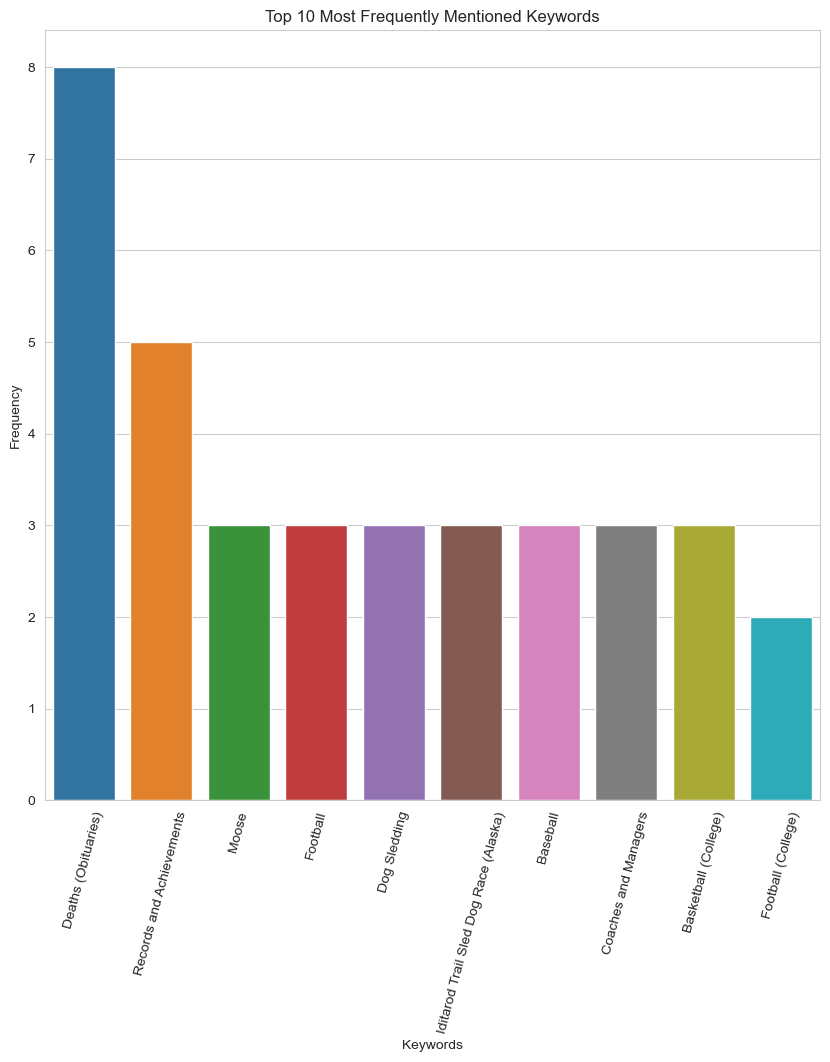

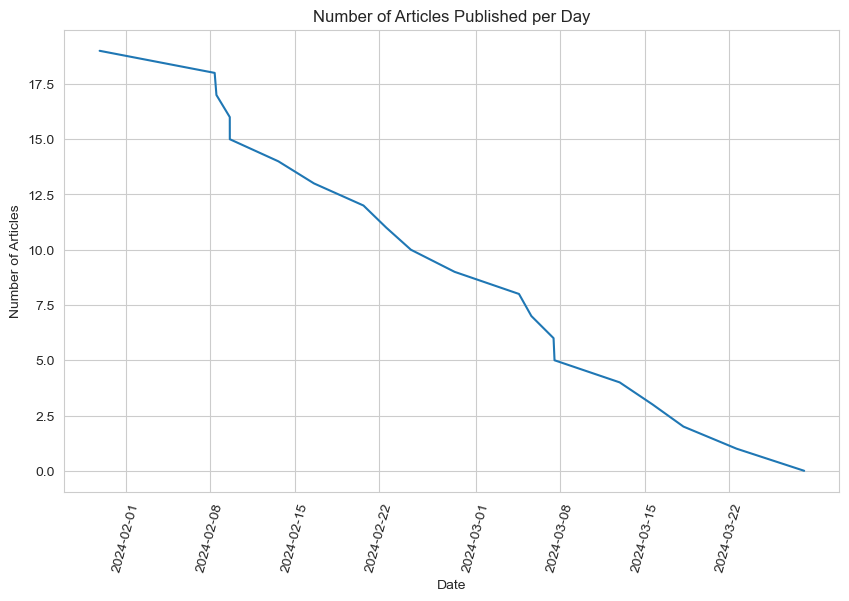

In [7]:
#visualizing top 10 keywords across sports articles on NYT using seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 10))
sns.barplot(x='des_facet', y='count', data = top_keywords, errorbar=None)
plt.title('Top 10 Most Frequently Mentioned Keywords')
plt.xticks(rotation=75)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()




# plotting/visualizing articles published per day starting 2024/01/01 to current date using seaborn

sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
sns.lineplot(x='published_date',y='index',data = pub_dates, errorbar = None)
plt.xticks(rotation=75)
plt.title('Number of Articles Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()
